In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf


In [10]:
def get_vix_closing_prices(start_timestamp: pd.Timestamp, end_timestamp: pd.Timestamp) -> pd.DataFrame:
    vix = yf.Ticker("^VIX")
    vix_data = vix.history(start=start_timestamp, end=end_timestamp)
    return vix_data

def get_spx_close_prices(start_timestamp: pd.Timestamp, end_timestamp: pd.Timestamp) -> pd.DataFrame:
    spx = yf.Ticker("^GSPC")
    spx_data = spx.history(start=start_timestamp, end=end_timestamp)
    return spx_data

In [17]:
start = pd.Timestamp("1970-01-01 00:00:00", tz="America/Chicago").tz_convert("UTC")
end = pd.Timestamp.now(tz="America/Chicago").tz_convert("UTC")

vix_df = get_vix_closing_prices(start, end)

In [18]:
vix_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0


In [20]:
vix_df.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99, 0.999, 0.9999])

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8666.000000,8666.000000,8666.000000,8666.000000,8666.0,8666.0,8666.0
mean,19.610874,20.410910,18.857045,19.519424,0.0,0.0,0.0
std,7.960502,8.415789,7.452924,7.885941,0.0,0.0,0.0
min,9.010000,9.310000,8.560000,9.140000,0.0,0.0,0.0
5%,11.380000,11.832500,11.020000,11.370000,0.0,0.0,0.0
10%,12.100000,12.600000,11.690000,12.080000,0.0,0.0,0.0
25%,13.910000,14.490000,13.382500,13.830000,0.0,0.0,0.0
50%,17.719999,18.375000,17.105000,17.670000,0.0,0.0,0.0
75%,23.040001,23.897500,22.260000,22.900000,0.0,0.0,0.0
90%,28.940001,30.040001,27.895000,28.799999,0.0,0.0,0.0


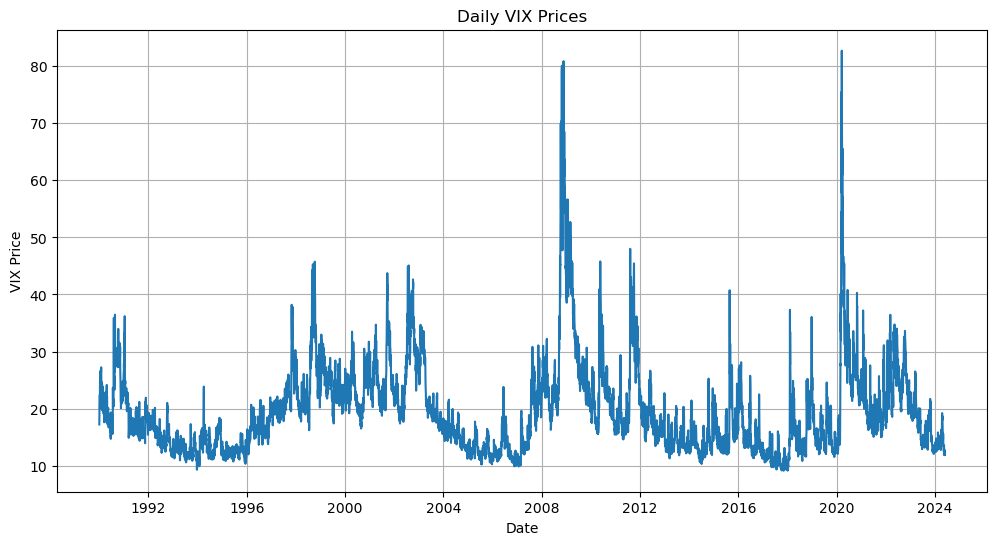

In [19]:
import matplotlib.pyplot as plt

# Plotting the daily VIX prices
plt.figure(figsize=(12, 6))
plt.plot(vix_df.index, vix_df['Close'])
plt.xlabel('Date')
plt.ylabel('VIX Price')
plt.title('Daily VIX Prices')
plt.grid(True)
plt.show()